<a href="https://colab.research.google.com/github/Tarun2901/GUVIDLCourse/blob/main/MorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1SM66e2mj9nOusnwrB8J4iMhoAJ9MIdmp


In [ ]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Hello World')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1iTU1VKOo8nyRn3dPnfjqMO9Cfq5bf5Z3


In [21]:

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1PuvbHLWqR_8Ky0dvusXga3SzI0a19m-q


In [ ]:


# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1PuvbHLWqR_8Ky0dvusXga3SzI0a19m-q'# https://drive.google.com/file/d/1PuvbHLWqR_8Ky0dvusXga3SzI0a19m-q/view?usp=sharing
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [ ]:
!ls

adc.json  mobile_cleaned_local.csd  mobile_cleaned_local.csv  sample_data


In [ ]:
import pandas as pd

In [ ]:
#read_xls for excel files
df = pd.read_csv('mobile_cleaned_local.csv')

In [ ]:
#Top 5 rows
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [23]:
#Last 5 rows
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [24]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
dir(df)

In [26]:
#Length of Dataframe
len(df)

109

In [28]:
df.shape

(109, 40)

In [29]:
df.loc[5]

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [30]:
#Subset a number of rows from the dataframe
df_short = df[0:10]

In [31]:
df_short.shape

(10, 40)

In [32]:
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [37]:
# Subset particular columns from the dataframe
df_thin = df[['stand_by_time', 'expandable_memory','price','battery_capacity','is_liked']]

In [38]:
df_thin.shape

(109, 5)

In [39]:
df_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [40]:
#We want to have rows which have is_liked as 1

df_liked = df_thin[df_thin['is_liked'] == 1]

In [41]:
df_liked.shape

(92, 5)

In [42]:
df_thin['price'].mean()

19373.211009174312

In [43]:
df_thin['price'].min()

3870

In [44]:
df_thin['price'].max()

64500

In [45]:
df_thin['price'].count()

109

In [46]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [47]:
df_thin.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,275.799767,14039.197220,655.003963,0.364496
min,160.00000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,2048.000000,64500.000000,5000.000000,1.000000


In [48]:
# Find mean of the price of all those phones that are liked

df_thin[df_thin['is_liked'] == 1]['price'].mean()

19393.239130434784

In [49]:
df_thin[df_thin['is_liked'] == 0]['price'].mean()

19264.823529411766

In [51]:
# Separate the entry of is_liked = 0 and 1
g = df_thin.groupby(['is_liked'])

In [52]:
for key,df_key in g:
  print(key)
  print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [53]:
# Alternate and perhaps a better way of computing mean of the price and other features
df_thin.groupby(['is_liked']).mean()

,stand_by_time,expandable_memory,price,battery_capacity
is_liked,,,,
0,457.235294,68.235294,19264.823529,2874.941176
1,394.945652,111.217391,19393.239130,2835.652174


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

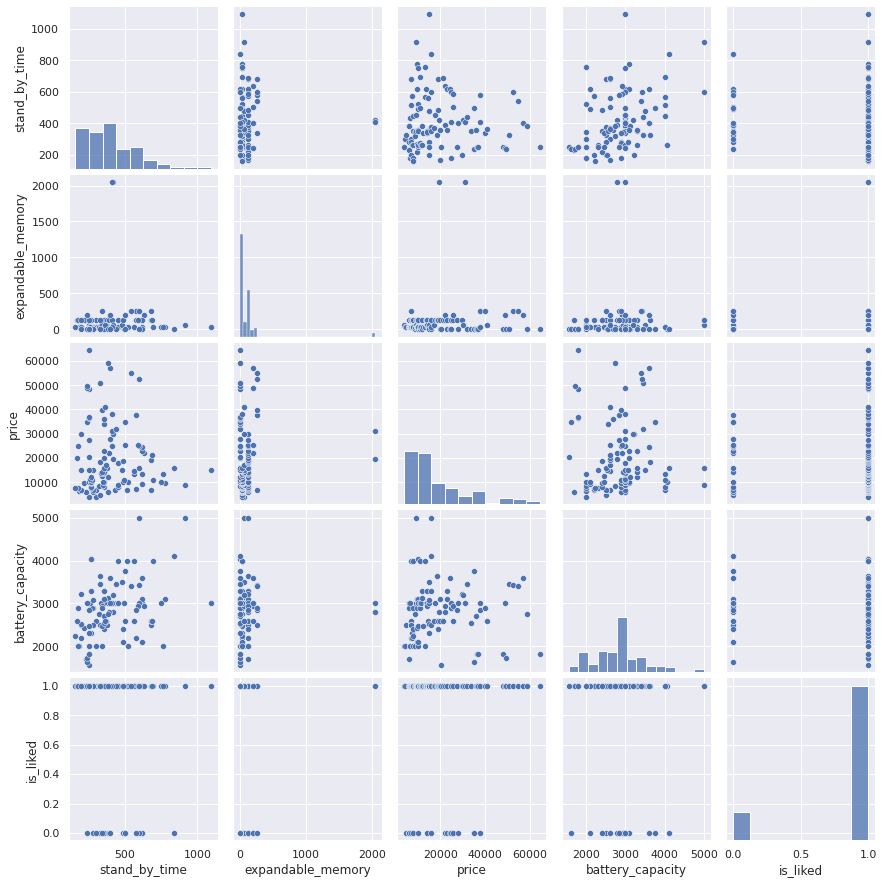

In [57]:
ax = sns.pairplot(df_thin,diag_kind = 'hist')

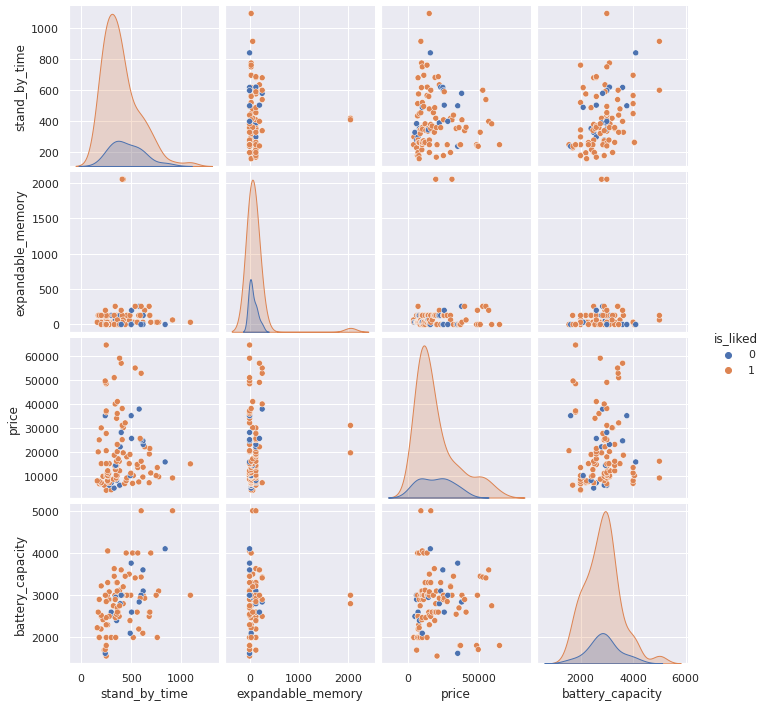

In [58]:
ax = sns.pairplot(df_thin,hue = 'is_liked')

# Debugging


In [62]:
import random

In [59]:
def factorial(x):
  if x == 0:
    return 1
  else:
    return x*factorial(x-1)

In [60]:
factorial(4)

24

In [61]:
factorial(5)

120

In [73]:
def code_to_debug():
  # import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial(x)

In [75]:
%xmode verbose

Exception reporting mode: Verbose


In [76]:
code_to_debug()

RecursionError: ignored

In [70]:
def factorial_debugged(x):
  if (not isinstance(x,int)):
    print('This method only supports integers')
    return -1
  if x == 0:
    return 1
  else:
    return x*factorial(x-1)

In [71]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [72]:
code_to_debug()

> <ipython-input-71-75d28099707d>(3)code_to_debug()
-> for i in range(10):
(Pdb) c



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
